<a href="https://colab.research.google.com/github/tmoura/covid/blob/master/covid1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
today = datetime.date.today()

day_use = "{}/{}/{}".format(today.day,today.month,today.year)

df = pd.read_csv(url)

cols = ['dateRep','day','month','year','cases','deaths','countriesAndTerritories','popData2019']
new_cols = ['country','deaths','population','deathPerMillion','firstReport','lastReport']

df = df[cols]
df = df.set_index(['countriesAndTerritories'])

In [ ]:
# First Death in Brazil: 18/03/2020
last_date =  pd.to_datetime(day_use,format='%d/%m/%Y')
days_passed = last_date - pd.to_datetime('18/03/2020',format='%d/%m/%Y')

# Convet all dates to datetime
df['dateRep'] = pd.to_datetime(df['dateRep'],format='%d/%m/%Y')

new_df = pd.DataFrame(columns=new_cols)

for c in df.index.unique():
    temp = df.loc[c]

    x = temp[temp['deaths'] != 0]

    if x.empty == False: # Country with deaths
    
        first_date = min(x['dateRep'])
        
        last_date_c = first_date + days_passed
        
        if last_date_c > last_date: # Days until 11/05/2020
            last_date_c = last_date
    
        temp = temp[(temp['dateRep'] >= first_date) & (temp['dateRep'] <= last_date_c)]
        tot_deaths = sum(temp['deaths'])

        population =  float(temp['popData2019'].iloc[0]) 

        deaths_per_million = tot_deaths/population 
        
        new_df = new_df.append({'country':c,'deaths':tot_deaths,'population':population,'deathPerMillion':deaths_per_million,'firstReport':first_date,'lastReport':last_date_c},ignore_index=True)

In [5]:
new_df = new_df[new_df['population'] >= 1000000]
new_df = new_df.sort_values(by='deathPerMillion', ascending=False)

new_df['deathPerMillion'] = round(new_df['deathPerMillion'] * 1000000)
new_df['deathPerMillion'] = new_df['deathPerMillion'].astype(int)

new_df = new_df[:20]

new_df = new_df.sort_values(by='deathPerMillion')

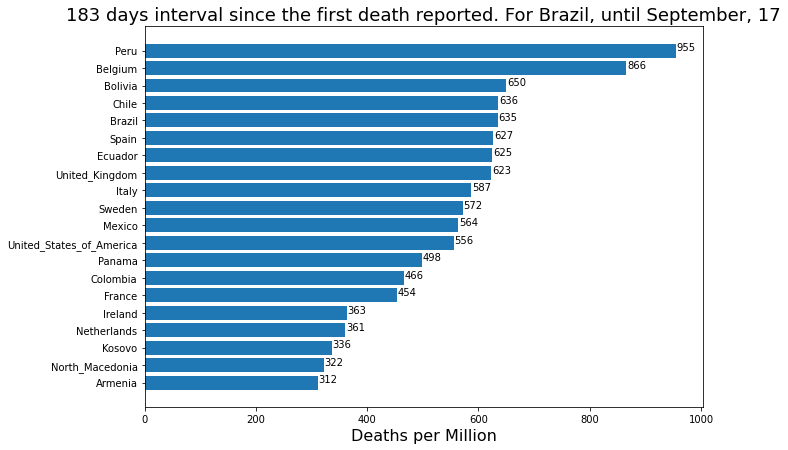

In [6]:
#### Bar Chart

plt.figure(figsize=(10,7))

xs = new_df['country']
ys = new_df['deathPerMillion']

plt.barh(xs,ys)
plt.title('{} days interval since the first death reported. For Brazil, until {}, {}'.format(days_passed.days,last_date.month_name(), last_date.day),fontsize=18)
plt.xlabel('Deaths per Million',fontsize=16)

xs = list(range(0,len(xs)))

for x,y in zip(xs,ys):

    label = '{:d}'.format(y)

    plt.annotate(label, # this is the text
                 (y,x), # this is the point to label
                 textcoords='offset points', # how to position the text
                 xytext=(10,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center